In [1]:
# Package Imports

import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics, cross_validation
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.stattools
import numpy as np
from  statsmodels.tsa.arima_model import ARIMA

C:\Users\manda\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Reading csv in to pandas dataframe

def read_data():

    data = pd.read_csv('D:/E Drive/ASU Study/CSE575 Statistical Machine Learning/Hobby/AirPollution.csv')

    return data


In [3]:
# Data Cleaning for Classification Methods


def gaussianNB(features, labels):

    acc = []
    classifier = GaussianNB()
    predict = cross_validation.cross_val_predict(classifier, features, labels, cv=10)
    acc.append(metrics.accuracy_score(predict, labels))
    F1 = metrics.f1_score(labels, predict, average='micro')
    P = metrics.precision_score(labels, predict, average='micro')
    R = metrics.recall_score(labels, predict, average='micro')
    return (float(sum(acc) / len(acc)))*100, F1*100, P*100, R*100

In [4]:
def DT(feature, labels):

    acc = []
    classifier = DecisionTreeClassifier()
    predict = cross_validation.cross_val_predict(classifier, feature, labels, cv=10)
    acc.append(metrics.accuracy_score(predict, labels))
    F1 = metrics.f1_score(labels, predict, average='micro')
    P = metrics.precision_score(labels, predict, average='micro')
    R = metrics.recall_score(labels, predict, average='micro')
    return (float(sum(acc) / len(acc)))*100, F1*100, P*100, R*100

In [5]:
def pm_classification(data):

    good = []
    moderate = []
    unhealthysg = []
    unhealthy = []
    pm_labels = []
    bad_values = []
    pm_list = data['pm2.5']

    for i, value in enumerate(pm_list):

        if math.isnan(value):
            #del pm_list[i]
            bad_values.append(i)
        elif (value > 0 and value <= 50):
            good.append(i)
            pm_labels.append(0)
        elif (value > 50 and value <= 100):
            moderate.append(i)
            pm_labels.append(1)
        elif (value > 100 and value <= 150):
            unhealthysg.append(i)
            pm_labels.append(2)
        else:
            unhealthy.append(i)
            pm_labels.append(3)


    data.drop(data.index[bad_values], inplace=True)
    features = data[['Iws', 'TEMP', 'PRES', 'Is', 'Ir']].copy()

    return features, pm_labels

In [6]:
def ar1(phi=0.9, n=1000, init=0):
    time_series = [init]
    error = np.random.rand(n)
    for period in range(n):
        time_series.append(error[period]+phi*time_series[-1])
    return pd.Series(time_series[1:], index=range(n))


def ar2(phi1=0.9, phi2=-0.8, n=1000, init=0):
    time_series = [init, init]
    error = np.random.rand(n)
    for period in range(2, n):
        time_series.append(error[period]+phi1*time_series[-1]+phi2*time_series[-2])
    return pd.Series(time_series[1:], index=range(1,n))

In [7]:
def MA1(theta=0.5, n=100):
    time_series = []
    error=np.random.rand(n)
    for period in range(1,n):
        time_series.append(error[period]+ theta*error[period-1])
    return pd.Series(time_series[1:], index=range(1, n-1))

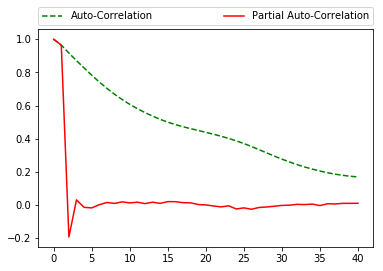

In [8]:
if __name__ == "__main__":

    # Read Data and convert the columns to DateTime index

    data = read_data()
    date_time = pd.DataFrame(pd.to_datetime(data[['year', 'month', 'day', 'hour']]))
    data = pd.concat([date_time, data], axis=1)
    #data = data.drop(['year', 'No', 'month', 'day', 'hour'], axis=1)
    data.columns.values[0]='Time'
    data.set_index(['Time'], inplace=True)

    # Drop Wind Direction values
    data = data.drop(['cbwd'], axis=1)

    # Drop NaN Values from PM2.5 Data
    data['pm2.5'].dropna(inplace=True)

    # Generate Auto-Correlation and Partial Auto-Correlation Graphs

    acf_results = statsmodels.tsa.stattools.acf(data['pm2.5'])
    pacf_results = statsmodels.tsa.stattools.pacf(data['pm2.5'])

    plt.plot(acf_results, color='green', label='Auto-Correlation', linestyle='--')
    plt.plot(pacf_results, color='red', label='Partial Auto-Correlation')

    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)

    plt.show()

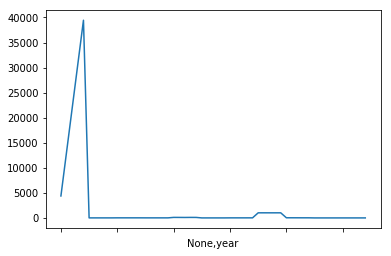

C:\Users\manda\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


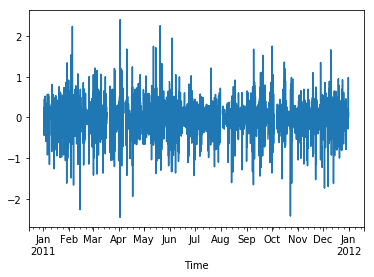

In [9]:
    data.groupby(['year']).mean().unstack().plot()
    plt.show()
    # Consider data for the year 2010 only

    data_partial = data['2011']

    # Data differencing example for introducing Stationarity

    log_temp = np.log(data_partial['pm2.5'])
    log_temp_diff = log_temp - log_temp.shift()
    log_temp_diff.plot()

    # Remove NaN values

    log_temp_diff.dropna(inplace=True)
    features, pm_labels = pm_classification(data_partial)

    acc_NB, F_NB, precision_NB, recall_NB = gaussianNB(features, pm_labels)
    acc_DT, F_DT, precision_DT, recall_DT = DT(features, pm_labels)

    # ARIMA model

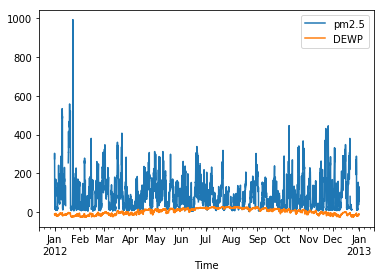

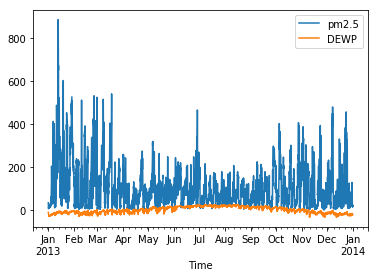

In [10]:
    data_partial = data['2012']
    data_partial_1 = data['2013']
    data_plot = data_partial[['pm2.5', 'DEWP']]
    data_plot_1 = data_partial_1[['pm2.5', 'DEWP']]
    data_plot.cumsum()
    data_plot_1.cumsum()
    data_plot.plot()
    data_plot_1.plot()
    plt.show()